# Assignment 3

## Andrew Marquardt

Question 1

Transient response equation:
\begin{align}
x(t) & = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)}
\end{align}

In [69]:
# Time constant: -1/a
# a = -Ua/Cp
# From model (after some fine-tuning):
Ua = 0.0487
Cp = 8.35
a = -Ua/Cp
tau = -1/a
print("Time constant: " + str(tau) + " seconds.")

Time constant: 171.45790554414785 seconds.


Question 2

In [14]:
# one time constant: x/xbar = 0.632
# take the data point at which this is best represented, then read off the corresponding time value
# (note: can do the same thing graphically)
# Use experimental data
import pandas as pd
data_file = "data/Model_Data.csv"
data = pd.read_csv("https://jckantor.github.io/cbe30338-2021/" + data_file).set_index("Time")[1:]
t = data.index
T0 = 21 # ambient temp used on this simulation
Tbar = 52.642 - T0
T = Tbar*(0.632) + T0
Tprint = '%.3f'%(T)
print("Target temperature: " + str(Tprint) + " degrees C.")
m = 10/(41.008-40.202)
b = 170-m*41.008
tau_new = m*T+b
print("Using localized linear interpolation, tau = " + str(tau_new) + " seconds.")
print(data)

Target temperature: 40.998 degrees C.
Using localized linear interpolation, tau = 169.87275434243173 seconds.
            T1      T2    Q1   Q2
Time                             
10.00   21.253  21.511  50.0  0.0
20.00   22.188  21.575  50.0  0.0
30.00   23.477  21.672  50.0  0.0
40.00   24.991  21.897  50.0  0.0
50.00   26.377  22.155  50.0  0.0
60.00   27.924  22.413  50.0  0.0
70.00   29.438  22.768  50.0  0.0
80.00   30.889  23.090  50.0  0.0
90.01   32.500  23.477  50.0  0.0
100.00  33.757  24.057  50.0  0.0
110.00  34.788  24.443  50.0  0.0
120.00  36.045  24.895  50.0  0.0
130.00  37.205  25.378  50.0  0.0
140.00  38.236  25.829  50.0  0.0
150.00  39.268  26.345  50.0  0.0
160.00  40.202  26.699  50.0  0.0
170.00  41.008  27.279  50.0  0.0
180.00  41.878  27.666  50.0  0.0
190.00  42.619  28.021  50.0  0.0
200.00  43.457  28.568  50.0  0.0
210.00  44.102  28.987  50.0  0.0
220.00  44.682  29.438  50.0  0.0
230.00  45.391  29.825  50.0  0.0
240.00  46.035  30.244  50.0  0.0
250.00

Question 3

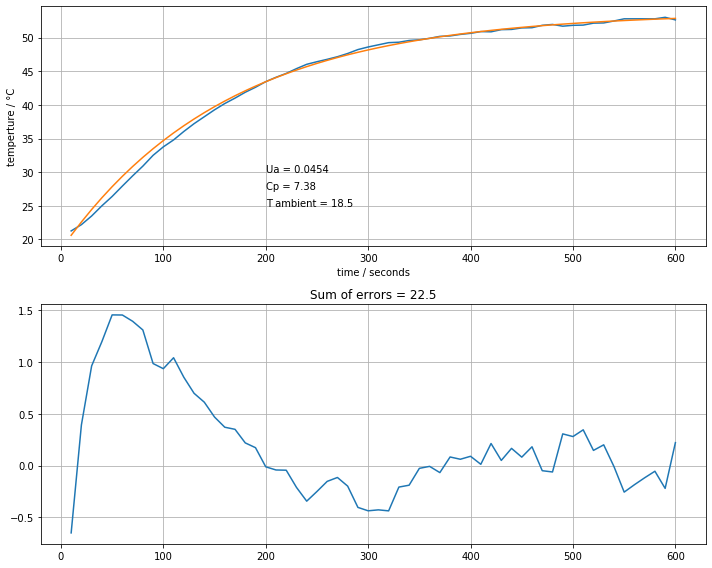

In [83]:
# required libraries
import numpy as np
from matplotlib import pyplot as plt

# required constant parameters (pulled from 2.3 notebook)
alpha = 0.00016        # watts / (units P1 * percent U1)
P1 = 200               # P1 units
U1 = 50                # steady state value of u1 (percent)

# function
def compare3(Ua, Cp, T_amb):
    T1_dev_initial = 0
    T1_dev_ss = alpha*P1*U1/Ua
    T1_dev = T1_dev_ss + (T1_dev_initial - T1_dev_ss)*np.exp(-Ua*t/Cp)
    T1_model = T1_dev + T_amb
    
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    
    ax[0].plot(t, T1, t, T1_model)
    ax[0].set_xlabel('time / seconds')
    ax[0].set_ylabel('temperture / °C')
    ax[0].grid(True)

    ax[0].text(200, 30, f'Ua = {Ua}')
    ax[0].text(200, 27.5, f'Cp = {Cp}')
    ax[0].text(200, 25, f'T ambient = {T_amb}')
    
    ax[1].plot(t, T1_model - T1)
    ax[1].set_title(f'Sum of errors = {sum(abs(T1_model-T1)):0.1f}')
    ax[1].grid(True)
    
    plt.tight_layout()

compare3(0.0454, 7.38, 18.5)

Discussion

I was able to significantly reduce the summed error, from 39.8 (error taken from the values used to calculate question #1) to 22.5, using successive trial and error iteration.  The model is still noticably bad, because it does not model the inflection point early in the experimental data curve, but the fit is clearly better.  However, this difference is not necessarily due to a structural improvement in the model fit, but because the ambient temperature in the model was decreased below what actually happened physically.  I would argue that the structural issues are still present and unsolved; this model, with the parameters I found, is merely "less bad" than the model parameters used in class.  In order to more precisely model the curve, and therefore reduce the summed error further, it is necessary to correctly model the inflection point.